## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [155]:
# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns

# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

# Importing the NumPy library for numerical operations (as np)
import numpy as np

In [156]:
amazon = pd.read_csv('amz_uk_price_prediction_dataset.csv')
display(amazon.shape)
display(amazon.head())
display(amazon.info())

(2443651, 9)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


None

In [157]:
num = amazon.select_dtypes(include="number") 
cat = amazon.select_dtypes(exclude="number")
num.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [158]:
cat.head()

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers


In [159]:
frequency_table = cat.category.value_counts()
frequency_table=pd.DataFrame(frequency_table)
frequency_table

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Motorbike Chassis,107
Alexa Built-In Devices,107
Plugs,107


In [160]:
frequency_table.describe()

,count
count,296.000000
mean,8255.577703
std,48563.852727
min,54.000000
25%,258.000000
50%,5230.500000
75%,9276.000000
max,836265.000000


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [161]:
display(type(frequency_table))
frequency_table.index
frequency_table.columns

pandas.core.frame.DataFrame

Index(['count'], dtype='object')

C:\Users\julia\AppData\Local\Temp\ipykernel_20000\1558841866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


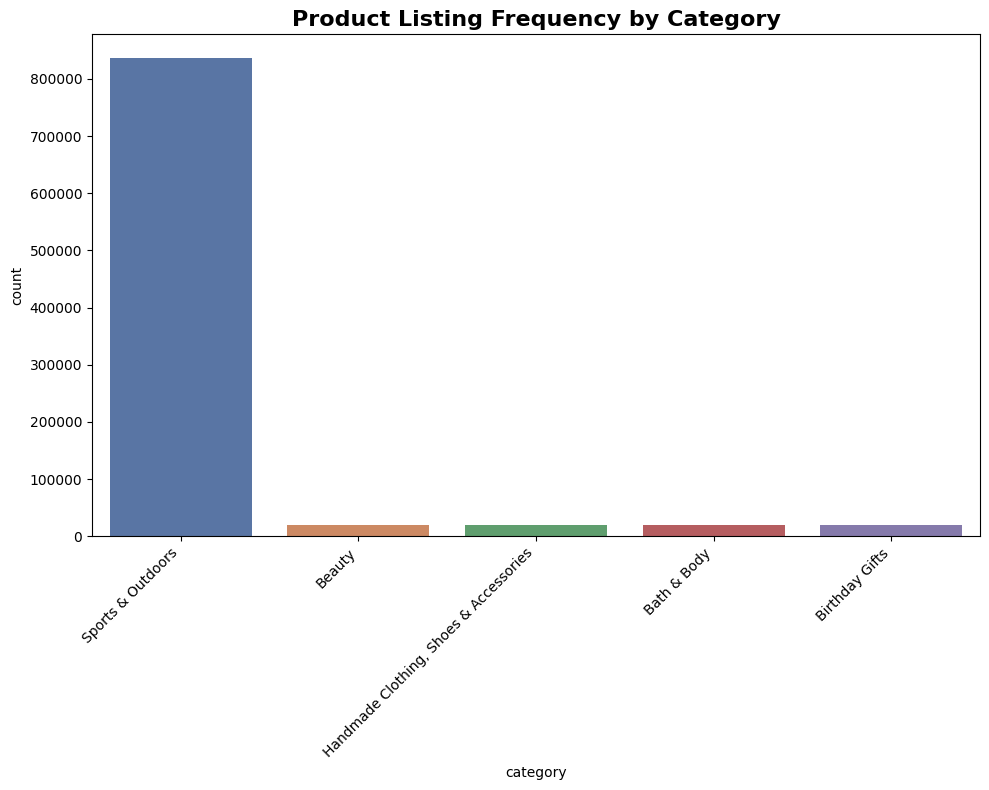

In [207]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x="category",
    y='count',
    data=frequency_table.head(),

    palette='deep',
    legend=False,
)
plt.xticks(rotation=45, ha='right')  # making the legends rotate 
plt.title("Product Listing Frequency by Category", fontsize=16, fontweight='bold')
plt.tight_layout()  # ← ADD THIS to prevent cutoff
plt.show()


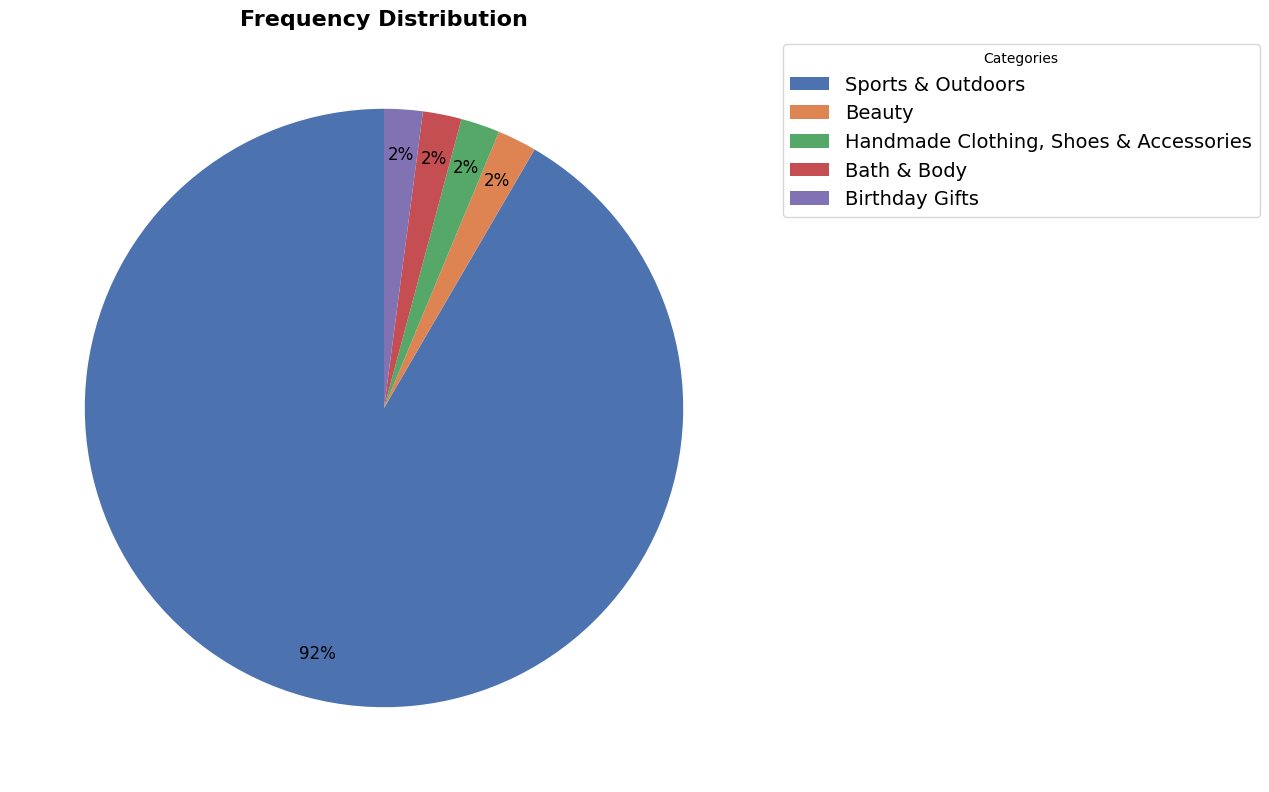

In [163]:
plt.figure(figsize=(12, 10))

# Create pie WITHOUT labels parameter
wedges, texts, autotexts = plt.pie(
    frequency_table.head()['count'],    # The values
    autopct='%1.0f%%',
    startangle=90,
    colors=sns.color_palette('deep'),
    pctdistance=0.85                      # ← Distance to center
    # labeldistance=1.1   # ← Move labels further out
)

# Style percentage text (black)    # Leave this section empty for default, but still add autotexts definition
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('normal')
    autotext.set_fontsize(12)

# Add legend OUTSIDE to the right
plt.legend(
    wedges,
    frequency_table.head().index,       # The labels
    title="Categories",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    fontsize=14
)

plt.title('Frequency Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Answer: The category "Sports & Outdoors" constitutes 91.6% of top 5 largest categories.

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [164]:
mean_value=amazon['price'].mean()
median_value=amazon['price'].median()
mode_value=amazon['price'].mode()[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 89.24380943923661
Median: 19.09
Mode: 9.99


In [165]:
print(f"\nComparison:")
print(f"The average price point is £{mean_value:.2f}")
print(f"The most common price is £{mode_value:.2f}")
if mean_value>mode_value:
    print("The average price > the most common price")
    print(f"Difference: £{(mean_value - mode_value):.2f}")
else:
    print("The average price < the most common price")
    print(f"Difference: £{(mode_value - mean_value):.2f}")


Comparison:
The average price point is £89.24
The most common price is £9.99
The average price > the most common price
Difference: £79.25


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [166]:
variance=round(amazon['price'].var(), 2)
stdev=round(amazon['price'].std(), 2)
price_range=round(amazon['price'].max()-amazon['price'].min(), 2)
iq_range=round((amazon['price'].quantile(0.75) - amazon['price'].quantile(0.25)), 2)  

print(f"Variance: {variance}")
print(f"Standard deviation: {stdev}")
print(f"Range: {price_range}")
print(f"Interquartile range: {iq_range}")


Variance: 119445.49
Standard deviation: 345.61
Range: 100000.0
Interquartile range: 36.0


Answer: The product prices vary significantly. There are several indicators that support this statement:  
    - The price range is £100000, which is 1120.6 times larger than the averaged price (£89.24), 10010.0 times larger than the mode price (£9,99) and 5238.3 times larger than the median price (£19,09).    
    - Standard deviation is £345.61, which is 3.9 times larger than the average price and 18.1 times larger than the median price.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [167]:
amazon['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

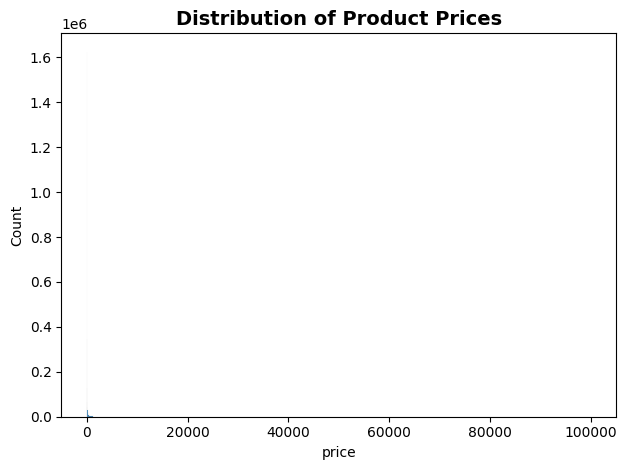

In [168]:
sns.histplot(amazon.price, bins="auto")
plt.title('Distribution of Product Prices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

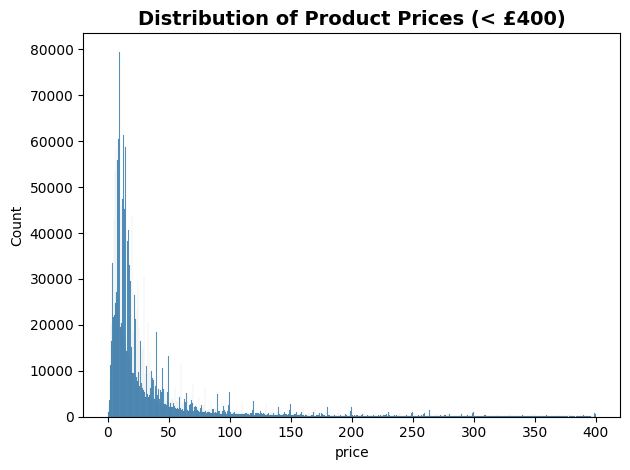

In [169]:
# Filter out extreme outliers (e.g., prices below £1000)
reasonable_prices = amazon[amazon['price'] < 400]['price']

sns.histplot(reasonable_prices, bins="auto")
plt.title('Distribution of Product Prices (< £400)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

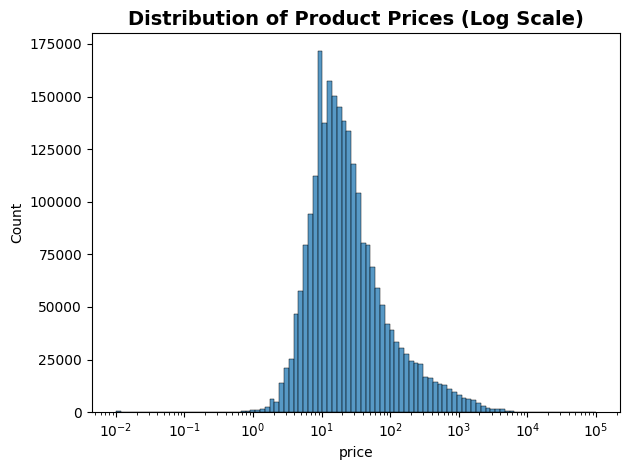

In [170]:
# Use log scale for x-axis
plt.xscale('log')
sns.histplot(amazon['price'][amazon['price'] > 0], bins=100)
plt.title('Distribution of Product Prices (Log Scale)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [171]:
amazon['price'].quantile(0.95)

np.float64(349.5)

When plotting a histogram of the product price distribution (upper plot, Part 2), the values can hardly be seen. The reason for this is the very large price range, with approximately 99% of prices being below £1000, and 95% of the prices below £350.   
  
  There are several possible ways to address this issue:  
    1. Showing the histogram for the majority of products (e.g., middle plot, Part 2) - focusing on the price range where most data points fall;    
    2. Applying a logarithmic scale to the x-axis allows for proper presentation of all values across the full range (e.g., lower plot);  
    3. Modifying the x-axis with techniques such as axis breaks to compress the extreme value range while maintaining readability;    
    4. Verifying that extreme prices are correct (e.g., not typos or data entry errors). If confirmed as accurate, assess whether these values are outliers and decide whether outliers should be excluded from the data/plots.

In [172]:
print(f"99% of the prices are below £{amazon['price'].quantile(0.99)}")
print(f"The number of the products with the price above 1408.82 is {len([amazon['price']>1408.82])}, the price for this product is £{amazon['price'].max()}")

99% of the prices are below £1408.82
The number of the products with the price above 1408.82 is 1, the price for this product is £100000.0


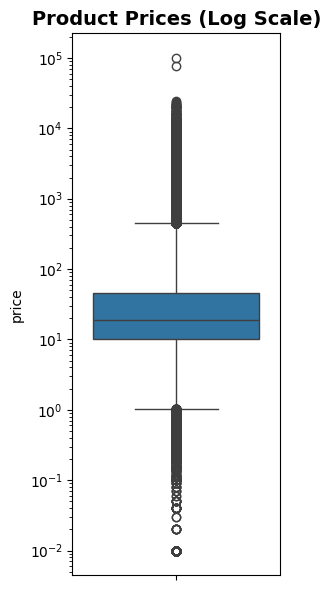

In [173]:
plt.figure(figsize=(3, 6))
plt.yscale('log')
sns.boxplot( y=amazon["price"] )
plt.title('Product Prices (Log Scale)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [183]:
mean_rating=amazon['stars'].mean()
median_rating=amazon['stars'].median()
mode_rating=amazon['stars'].mode()[0]

print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")

Mean: 2.152836472966066
Median: 0.0
Mode: 0.0


In [185]:
display(amazon['stars'].describe())
display(amazon['stars'].info())
amazon.stars.value_counts()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 2443651 entries, 0 to 2443650
Series name: stars
Non-Null Count    Dtype  
--------------    -----  
2443651 non-null  float64
dtypes: float64(1)
memory usage: 18.6 MB


None

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [179]:
display(amazon['reviews'].describe())
display(amazon['reviews'].info())
amazon.reviews.value_counts()

count    2.443651e+06
mean     4.806278e+02
std      5.944124e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.900000e+01
max      1.356658e+06
Name: reviews, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 2443651 entries, 0 to 2443650
Series name: reviews
Non-Null Count    Dtype
--------------    -----
2443651 non-null  int64
dtypes: int64(1)
memory usage: 18.6 MB


None

reviews
0        1225641
1          90033
2          54452
3          39922
4          30720
          ...   
8808           1
26910          1
14194          1
24368          1
84267          1
Name: count, Length: 19446, dtype: int64

In [181]:
# Total rows in dataset
total_rows = len(amazon)

# Non-null reviews
non_null_reviews = amazon['reviews'].count()

# Number of zeros
zeros = (amazon['reviews'] == 0).sum()

# Percentage of products with 0 reviews
zero_percentage = (zeros / non_null_reviews) * 100

print(f"Total products: {total_rows:,}")
print(f"Products with review data: {non_null_reviews:,}")
print(f"Products with 0 reviews: {zeros:,}")
print(f"Percentage with 0 reviews: {zero_percentage:.1f}%")


Total products: 2,443,651
Products with review data: 2,443,651
Products with 0 reviews: 1,225,641
Percentage with 0 reviews: 50.2%


In [195]:
# Total rows in dataset
total_rows = len(amazon)

# Non-null reviews
non_null_stars = amazon['stars'].count()

# Number of zeros
zero_stars = (amazon['stars'] == 0).sum()

# Percentage of products with 0 reviews
zero_percent = (zero_stars / non_null_stars) * 100

# Checking if all products with 0 rating have 0 reviews
Check=bool(zeros == zero_stars)

print(f"Total products: {total_rows:,}")
print(f"Products with rating data: {non_null_stars:,}")
print(f"Products with 0 stars: {zero_stars:,}")
print(f"Percentage with 0 stars: {zero_percent:.1f}%")
print(f"Data with 0 ratings equal to data with 0 stars: {Check}")

Total products: 2,443,651
Products with rating data: 2,443,651
Products with 0 stars: 1,225,641
Percentage with 0 stars: 50.2%
Data with 0 ratings equal to data with 0 stars: True


In [197]:
# Summary for the rating containing non-zero values
non_zeros=amazon[amazon['stars'] > 0]

mean_star=non_zeros['stars'].mean()
median_star=non_zeros['stars'].median()
mode_star=non_zeros['stars'].mode()[0]

print(f"Mean: {mean_star}")
print(f"Median: {median_star}")
print(f"Mode: {mode_star}")

Mean: 4.319160762226911
Median: 4.4
Mode: 4.5


In [199]:
display(non_zeros['stars'].describe())

count    1.218010e+06
mean     4.319161e+00
std      5.552868e-01
min      1.000000e+00
25%      4.100000e+00
50%      4.400000e+00
75%      4.600000e+00
max      5.000000e+00
Name: stars, dtype: float64

,count
stars,
4.5,151577
4.6,136995
4.4,136165
5.0,128492
4.3,112564


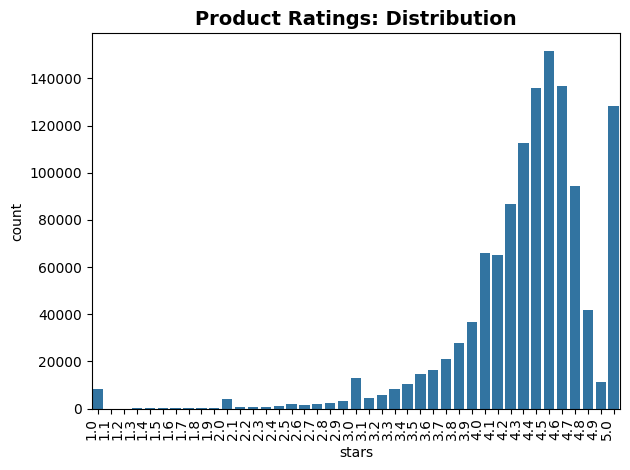

In [211]:
frequency_table2 = non_zeros.stars.value_counts()
frequency_table2=pd.DataFrame(frequency_table2)
display(frequency_table2.head())

plt.xticks(rotation=90, ha='right')
sns.barplot(data=frequency_table2, x="stars", y="count", errorbar=None)
plt.title('Product Ratings: Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

How do customers generally rate products? Is there a common trend?  
Answer: 50.2% of products' data contains no reviews. This data received value 0 in rating and therefore should be ignored in the analysis.  
From rest of the products, 75% of the ratings receive rating above 4.1 with the maximum rating being 5 stars.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [200]:
variance_r=round(non_zeros['stars'].var(), 2)
stdev_r=round(non_zeros['stars'].std(), 2)
star_range=round(non_zeros['stars'].max()-non_zeros['stars'].min(), 2)
iq_range_r=round((non_zeros['stars'].quantile(0.75) - non_zeros['stars'].quantile(0.25)), 2)  

print(f"Variance: {variance_r}")
print(f"Standard deviation: {stdev_r}")
print(f"Range: {star_range}")
print(f"Interquartile range: {iq_range_r}")

Variance: 0.31
Standard deviation: 0.56
Range: 4.0
Interquartile range: 0.5


Are the ratings consistent, or is there a wide variation in customer feedback?  
Answer: although the range is large (4 out of 5), half of the ratings fall into 0.5 star ratings. As we have seen earlier, 75% of ratings are above 4.1. Therefore, the ratings are consistent.

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [202]:
print(f"Skewness: {non_zeros["stars"].skew()}")
print(f"Kurtosis: {non_zeros["stars"].kurtosis()}")

Skewness: -2.379568112212799
Kurtosis: 9.78193769066435


Are the ratings normally distributed, or do they lean towards higher or lower values?  
Since the skewness and kurtosis are far from 0 (0 indicates normality), we could conclude that the ratings' distribution is not normal.  
The negative skewness of -2.38 indicates a strong left-skewed (negatively skewed) distribution. This means the ratings lean towards higher values, with most ratings concentrated on the higher end of the scale.   


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

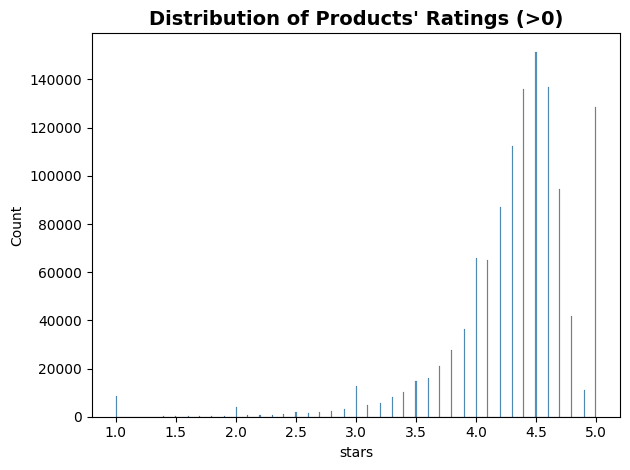

In [204]:
sns.histplot(non_zeros.stars, bins="auto")
plt.title("Distribution of Products' Ratings (>0)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

The most common rating is 4.5, closely followed by 4.4 and 4.6 and then 5.0.

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.

**Summary & Insights:**  
The analysis of Amazon UK product data reveals key insights into product distribution, pricing, and customer satisfaction.  

Product Distribution:
- Sports & Outdoors dominates the marketplace with 836,265 listings (34.2%), significantly outpacing other categories.  
Product Prices:  
- Product prices show extreme variability (range: £100,000; SD: £345.61), with 95% of products priced below £350, though the mean price is £89.24 due to outliers.   
Product Ratings:  
- Product ratings show a strong positive skew (skewness: -2.38), indicating most customers provide high ratings, with 75% of rated products scoring above 4.1 stars.   
- The exceptionally high kurtosis (9.78) suggests occasional extreme deviations from typical ratings, pointing to either outstanding or low-quality products. The low rating variance (0.31) and standard deviation (0.56) demonstrate relatively consistent customer satisfaction across the platform.

**Future Directions:**  

Based on this exploratory analysis, several avenues warrant further investigation:
1. **Category-specific pricing strategies:** Examine whether pricing patterns differ significantly across product categories
2. **Rating-price correlation:** Investigate whether higher-priced products receive different rating distributions
3. **Outlier analysis:** Identify and analyze the characteristics of extreme-priced products and products with polarizing ratings